In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = yf.download('TSLA').reset_index()
df = df[(df['Date']>= "2012-01-01") & (df['Date'] <= "2024-06-12")].reset_index(drop=True)

[*********************100%%**********************]  1 of 1 completed


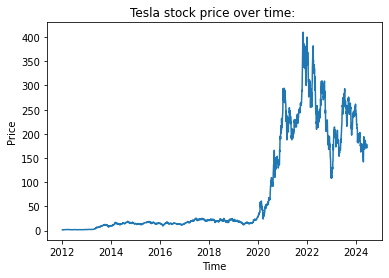

In [17]:
plt.plot(df['Date'], df['Close'])
plt.title("Tesla stock price over time: ")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df['scaled_values'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))

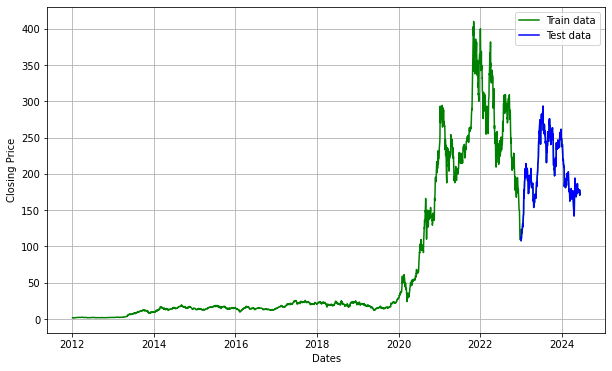

In [19]:
train_data = df[df['Date'] < '2023-01-01']
test_data = df[df['Date'] >= '2023-01-01']

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(df['Date'], df['Close'], 'green', label='Train data')
plt.plot(test_data['Date'], test_data['Close'], 'blue', label='Test data')
plt.legend()

In [20]:
x_train = []
y_train = []

for i in range(60, len(train_data['scaled_values'])):
    x_train.append(train_data['scaled_values'][i-60:i])
    y_train.append(train_data['scaled_values'][i])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [21]:
x_test = []
y_test = test_data['scaled_values']


for i in range(60, len(test_data)):
    x_test.append(test_data['scaled_values'][i-60:i])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [22]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [23]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.25))

In [24]:
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.25))

In [25]:
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.25))

In [26]:
model.add(LSTM(units = 50))
model.add(Dropout(0.25))

In [27]:
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 0.0142
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0026
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0028
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0022
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0020
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0024
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0020
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0020
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0016
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0017


In [30]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


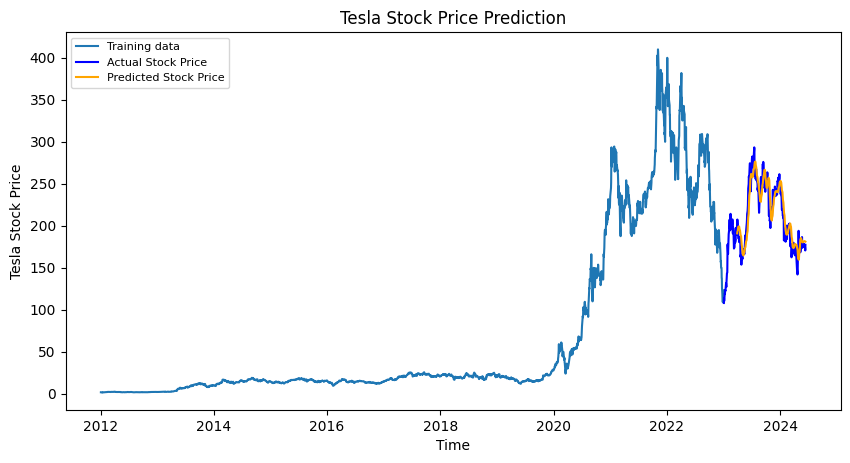

In [31]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data['Date'], train_data['Close'], label='Training data')
plt.plot(test_data['Date'], test_data['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(test_data[60:]['Date'], predicted_stock_price, color = 'orange',label='Predicted Stock Price')

plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error
import math

y_true = test_data[60:]['Close'].values
y_pred = predicted_stock_price

# report performance
mse = mean_squared_error(y_true, y_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))
print('MAPE: '+str(mape))

MSE: 244.01488108149877
MAE: 12.537412687496778
RMSE: 15.620975676362177
MAPE: 0.19897022082095475
